<a href="https://colab.research.google.com/github/team-epoch/EPOCH_4th_TASK/blob/main/4th_TASK/DevelopTeam/Practice/week2/4%EA%B8%B0_%EC%9D%B4%EC%A7%80%EC%9C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 05 로지스틱 회귀
> 타이타닉 생존자 예측하기

**👍🏻 장점**
* 선형 회귀 분석만큼 구현하기 용이
* 계수(기울기)를 사용해 각 변수의 중요성을 쉽게 파악할 수 있음

**👎🏻 단점**
* 선형 회귀 분석을 근간으로 하고 있기 때문에, 선형 관계가 아닌 데이터에 대한 예측력이 떨어짐

## 5.2 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url) # 데이터셋 읽기

## 5.3 데이터 확인하기

In [2]:
data.head() # 상위 5행 출력

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


**✅ 컬럼 정보**
* `Pclass`: 티켓 클래스
* `Name`: 승객 이름
* `Sex`: 성별
* `Age`: 나이
* `SibSp`: 함께 탑승한 형제 및 배우자의 수
* `Parch`: 함께 탑승한 부모 및 자녀의 수
* `Ticket`: 티켓 번호
* `Embarked`: 승선한 항구(C=Cherbourg, Q=Queenstown, S=Southampton)
* `Survived`: 생존 여부 ➡️ 종속 변수

### 변수 특징 출력

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


*결측치 없음*

*`Name`, `Sex`, `Ticket`, `Embarked`: object(문자형) 변수*

### 통계 정보 출력

In [11]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


*`Pclass`에는 1/2/3 3가지의 값 존재*

*`Age`는 50%(중앙값)이 28, 75%(상위 25%)가 35였다가 max가 80으로 갑자기 높아짐*
*➡️ 대부분 승객이 비교적 젊은층이나, 일부 나이가 많은 승객들이 있다고 해석 가능*

*`SibSp`와 `Parch`는 25%와 50% 값이 모두 0, `Parch`는 75% 값까지 0 ➡️ 대부분의 승객이 가족을 동반하지 않고 혼자 탑승*

### 상관관계 출력

✅ **상관관계**
> 두 변수 간의 관련성
>
> 0에 가까울수록 상관관계가 없는 것, ±1에 가까울수록 상관관계가 큰 것

*e.g. 변수 A가 증가할 때, B도 증가하면 상관관계가 있다고 할 수 있음*

*반대로 A가 증가할 때 B가 감소한다 이 또한 음의 방향으로 상관관계가 있다 할 수 있음*

<br>

🔎 **일반적인 해석**
* `0.2 이하`: 상관관계가 거의 없음
* `0.2 ~ 0.4`: 낮은 상관관계
* `0.4 ~ 0.6`: 중간 수준의 상관관계
* `0.6 ~ 0.8`: 높은 상관관계
* `0.8 이상`: 매우 높은 상관관계

In [12]:
round(data.corr(numeric_only=True), 2)

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.00,-0.34,0.08,0.02,-0.34
Age,-0.34,1.00,-0.23,-0.17,-0.07
SibSp,0.08,-0.23,1.00,0.41,-0.03
Parch,0.02,-0.17,0.41,1.00,0.08
Survived,-0.34,-0.07,-0.03,0.08,1.00


*`SibSp`와 `Parch`의 상관관계가 0.41로 가장 큼*

**💡상관관계는 숫자형 데이터만 계산이 가능함**

➡️ `numeric_only=True` 파라미터를 지정함으로써 숫자형 데이터만 포함하여 상관계수를 계산하도록 함

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

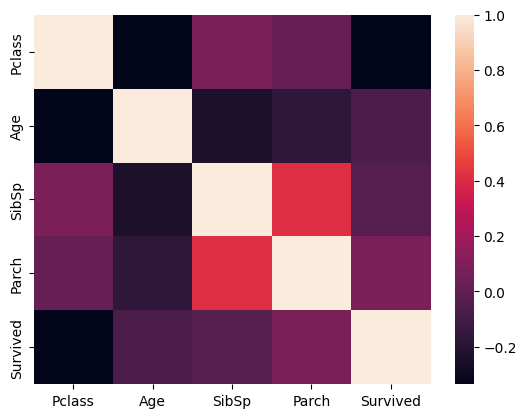

In [14]:
sns.heatmap(data.corr(numeric_only=True)) # 상관관계에 대한 히트맵 생성
plt.show() # 그래프 출력(맷플롯립과 시본이 최근 버전이면 제외해도 됨)

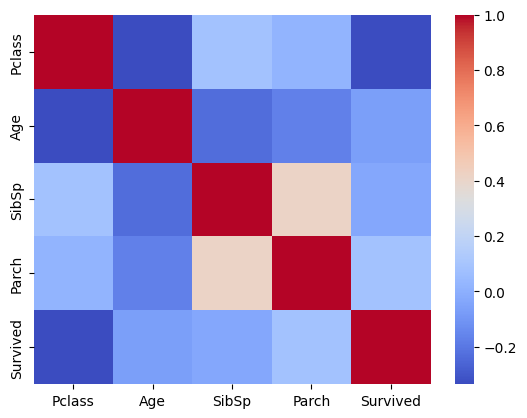

In [15]:
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm') # 히트맵 생성
plt.show() # 그래프 출력

<Axes: >

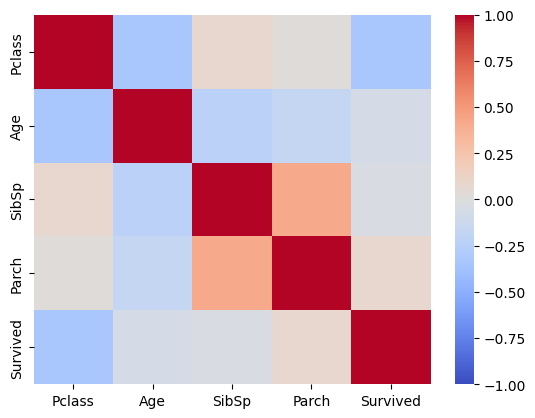

In [18]:
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1) # 색상 밸런스 조정

<Axes: >

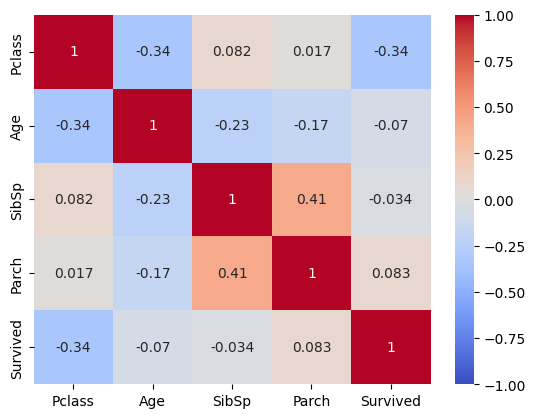

In [19]:
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1, annot=True) # 상관관계 수치 출력

## 5.4 전처리 : 범주형 변수 변환하기(더미변수와 원-핫 인코딩)

> 기본적으로 머신러닝 알고리즘에서는 문자열로 된 데이터를 이해하지 못함
>
> ➡️ 숫자 데이터로 변환 !

*e.g. 봄, 여름, 가을, 겨울을 1, 2, 3, 4로 변환할 경우, 상대적 서열로 인식되기 때문에 이 방법은 지양해야 함*

✅ **더미 변수와 원-핫 인코딩**
> 범주 형태(혹은 문자 형태)의 변수를 숫자로 표현하는 방법으로, 변수에 속해 있는 고윳값에 대한 새로운 변수들을 만들어 0과 1로 표현

*🤔 다만, 값이 수백 수천가지라면 수백 수천 개의 컬럼이 필요하기 때문에 데이터에서 제외시키거나 다른 방법으로 처리하는 것이 좋음*

In [21]:
data['Name'].nunique() # 고윳값 개수 확인

889

In [22]:
data['Sex'].nunique()

2

In [23]:
data['Ticket'].nunique()

680

In [24]:
data['Embarked'].nunique()

3

`Name`과 `Ticket`은 더미 변수화하기도 어렵고, 종속 변수 예측에 꼭 필요한 변수가 아니므로 제외

In [25]:
data = data.drop(['Name', 'Ticket'], axis=1)

In [26]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


### 원-핫 인코딩

In [27]:
pd.get_dummies(data, columns=['Sex', 'Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,False,True,False,False,True
885,1,19.0,0,0,1,True,False,False,False,True
886,3,28.0,1,2,0,True,False,False,False,True
887,1,26.0,0,0,1,False,True,True,False,False


In [28]:
pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True) # 고윳값 개수보다 하나 덜 사용

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


In [29]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True) # 최종 데이터 저장

## 5.5 모델링 및 예측하기

### 데이터 분할

In [30]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis = 1) # 데이터셋에서 종속변수 제거 후 저장
y = data['Survived'] # 데이터셋에서 종속변수만 저장
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) # 훈련셋, 테스트셋 분리

### 모델 학습 및 예측

In [31]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 임포트

In [32]:
model = LogisticRegression() # 로지스틱 회귀 모델 생성
model.fit(X_train, y_train) # 모델 학습

LogisticRegression()

In [33]:
pred = model.predict(X_test) # 예측

## 5.6 예측 모델 평가하기

**이진분류(Binary classification) 평가 지표**
* 정확도(accuracy)
* 오차 행렬
* 정밀도(precision)
* 재현율(recall)
* F1 score
* 민감도(sensitivity)
* 특이도(specificity)
* AUC

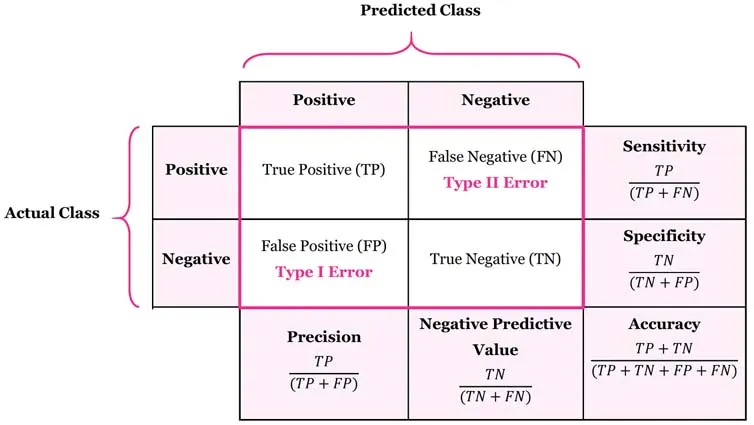

`accuracy(정확도)`: 얼마나 맞추었는지 확인

(TP + TN) / (TP + TN + FP + FN)

In [34]:
from sklearn.metrics import accuracy_score # 정확도 라이브러리 임포트
accuracy_score(y_test, pred) # 실젯값과 예측값으로 정확도 계산

0.7808988764044944

*약 78%의 정확도*

**🤔 정확도는 절대적인 지표가 될 수 없다**

*e.g. 0이 95%고, 1이 5%로 구성된 이진분류의 경우, 머신러닝 모델 없이 모든 값을 0으로 예측하여도 95%의 정확도가 나올 수 있으므로 이 경우에는 정확도가 90%여도 좋은 값이라 할 수 없음*

In [36]:
model.coef_ # 회귀분석 모델의 계수 확인

array([[-1.18234354, -0.03991188, -0.32140308,  0.00730054, -2.56910288,
        -0.07696271, -0.23548312]])

*2중 리스트 형태로, 그 길이가 1이 됨*

In [37]:
len(model.coef_[0])

7

In [38]:
pd.Series(model.coef_[0], index=X.columns)
# model.coef_를 7개 값이 되도록 풀어서 컬럼 이름을 매핑

,0
Pclass,-1.182344
Age,-0.039912
SibSp,-0.321403
Parch,0.007301
Sex_male,-2.569103
Embarked_Q,-0.076963
Embarked_S,-0.235483


*`Parch` 제외 모두 음수*

✅ **변수 해석**
* `Pclass`: 음의 계수이므로, 높을수록 생존 가능성이 낮음
> 낮은 숫자일수록 비행기의 퍼스트 클래스처럼 더 비싼 티켓이기 때문에 생존에 더 유리하게 작용했을 수 있음

* `Age`: 낮을수록, `Sex`: 여성이 생존 가능성이 높음

## 5.7 이해하기 : 피처 엔지니어링

✅ **피처 엔지니어링(Feature Engineering)**
> 기존 데이터를 손보아 더 나은 변수를 만드는 기법

✅ **다중공선성(Multicollinearity)**
> 독립변수 사이에 상관관계가 높은 때에 발생하는 문제
>
> 선형 모델은 독립변수 간의 독립성을 전제로 하기 때문에, 다중공선성 문제를 해결해주는 것이 좋음
>
> 상관관계가 높은 변수 중 하나를 제거하거나, 둘을 모두 포괄시키는 새로운 변수를 만들거나, PCA와 같은 방법으로 차원 축소를 수행해 해결

✅ **PCA(Principal Component Analysis)**
> 데이터의 차원, 즉 독립변수의 개수를 줄이는 방법

In [39]:
data['family'] = data['SibSp'] + data['Parch'] # SibSp와 Parch 변수 합치기
data.drop(['SibSp', 'Parch'], axis=1, inplace=True) # SibSp와 Parch 변수 삭제
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


*부모와 자식, 형제/자매와 배우자 컬럼을 가족 구성원 컬럼 하나로 대체*

새로운 데이터를 가지고 모델링 재진행

In [40]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742

## 5.8 이해하기 : 로지스틱 회귀

**🤔 0과 1만 갖는 이진분류에 회귀분석을 적용하면?**
> 0과 1사이에 있는 값도 가질 수 있는 직선으로 예측되며, 1과 0을 벗어나는 예측값도 나오게 됨

<br>

**💡 우리의 목푯값은 0과 1**
> 로지스틱 회귀 분석은 로지스틱 함수(Logistic function)을 사용하여 0과 1사이에 있는 값은 반올림되어 0과 1만 가지게 됨

> `predict_proba()`를 사용하여 0과 1사이의 구체적인 예측값을 확인할 수 있음

## 🤔 Question

1️⃣ 왜 로지스틱 회귀에서는 `model.coef_`로 계수를 확인하였을 때 이중 리스트 형태가 반환되는 걸까?

2️⃣ 고유값이 많은 경우에는 원-핫 인코딩을 하였을 때 컬럼이 너무 많이 생성될 수 있어 지양해야 한다고 한다. 그렇다면 이런 경우에는 원-핫 인코딩 대신 어떤 방법으로 object 형태의 컬럼들을 숫자형 데이터로 변환할 수 있을까?

# Chapter 06 K-최근접 이웃(KNN)
> 와인 등급 예측하기

KNN은 거리 기반 모델로, 선형 관계를 전제로 하지 않음

즉, 데이터 간의 거리를 활용해 새로운 데이터를 예측하는 모델로, K개의 가장 가까운 이웃 데이터에 의해 예측됨

✅ **장점**
* 수식에 대한 설명이 필요 없을 만큼 직관적이고 간단
* 선형 모델과 다르게 별도의 가정이 없음

✅ **단점**
* 데이터가 커질수록 상당히 느려질 수 있음
* 아웃라이어에 취약

## 6.2 라이브러리 및 데이터 불러오기

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data = pd.read_csv(file_url)

## 6.3 데이터 확인하기

In [42]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


**✅ 컬럼 정보**
* `alcohol`: 알코올(도수)
* `malic_acid`: 알산(사과산)
* `ash`: 증발/소각 후 남은 무기물
* `alcalinity_of_ash`: 남은 무기물의 알칼리성
* `magnesium`: 마그네슘
* `total_phenols`: 전체 페놀
* `flavanoids`: 플라보노이드(색소)
* `nonflavanoid_phenols`: 비색소 페놀
* `proanthocyanins`: 프로안토시아닌
* `color_intensity`: 색상 강도
* `hue`: 색조
* `od280/od315_of_diluted_wines`: 희석된 와인의 단백질 함량
* `proline`: 프롤린
* `class`: 와인 등급 ➡️ 목표 변수

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [44]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 6.4 목푯값에서 고윳값 확인하기

In [45]:
data['class'].unique() # 목표 변수의 고윳값 출력

array([0, 1, 2])

In [46]:
data['class'].nunique() # 고윳값 가짓수 출력

3

In [47]:
data['class'].value_counts() # 각 고윳값에 해당하는 개수 출력

,count
class,
1,71
0,59
2,48


<Axes: xlabel='class', ylabel='count'>

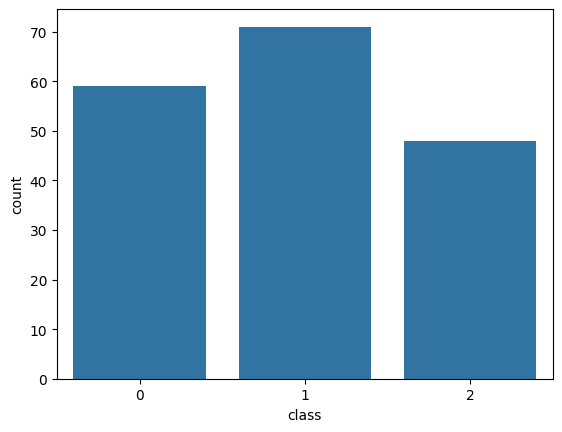

In [48]:
sns.barplot(x = data['class'].value_counts().index, y = data['class'].value_counts()) # 막대 그래프 생성 및 출력

In [49]:
data['class'].value_counts().index

Index([1, 0, 2], dtype='int64', name='class')

## 6.5 전처리 : 결측치 처리하기

### 6.5.1 결측치를 쉽게 확인하는 방법

In [53]:
data.isna() # 값을 결측치 여부에 따라 TRUE/FALSE 반환

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
data.sum() # 변수별 합 출력

,0
alcohol,2286.080000
malic_acid,415.870000
ash,421.240000
alcalinity_of_ash,3470.100000
magnesium,17754.000000
total_phenols,408.530000
flavanoids,361.210000
nonflavanoid_phenols,62.690000
proanthocyanins,283.180000
color_intensity,900.339999


In [55]:
data.isna().sum() # 값을 TRUE/FALSE로 변환 후 합 출력

,0
alcohol,2
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,5
proanthocyanins,0
color_intensity,0


In [56]:
data.mean() # 평균 출력

,0
alcohol,12.989091
malic_acid,2.336348
ash,2.366517
alcalinity_of_ash,19.494944
magnesium,99.741573
total_phenols,2.295112
flavanoids,2.029270
nonflavanoid_phenols,0.362370
proanthocyanins,1.590899
color_intensity,5.058090


In [58]:
data.isna().mean() # 값을 TRUE/FALSE로 변환 후 평균 출력 = 결측치 비율

,0
alcohol,0.011236
malic_acid,0.000000
ash,0.000000
alcalinity_of_ash,0.000000
magnesium,0.000000
total_phenols,0.000000
flavanoids,0.000000
nonflavanoid_phenols,0.028090
proanthocyanins,0.000000
color_intensity,0.000000


### 6.5.2 결측치를 처리하는 방법

1️⃣ **결측치 행 제거하기 : `dropna()`**

In [59]:
data.dropna() # 결측치가 있는 행 제거

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [60]:
data.dropna().isna().mean()

,0
alcohol,0.0
malic_acid,0.0
ash,0.0
alcalinity_of_ash,0.0
magnesium,0.0
total_phenols,0.0
flavanoids,0.0
nonflavanoid_phenols,0.0
proanthocyanins,0.0
color_intensity,0.0


In [61]:
# data = data.dropna()
# data.dropna(inplace=True)

In [62]:
data.dropna(subset=['alcohol']) # 지정된 변수의 결측치 행만 제거하기

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [63]:
data.dropna(subset=['alcohol']).isna().mean()

,0
alcohol,0.000000
malic_acid,0.000000
ash,0.000000
alcalinity_of_ash,0.000000
magnesium,0.000000
total_phenols,0.000000
flavanoids,0.000000
nonflavanoid_phenols,0.028409
proanthocyanins,0.000000
color_intensity,0.000000


*`alcohol`의 결측치만 제거됨*

2️⃣ **결측 변수 제거하기 : `drop()`**

In [64]:
data.drop(['alcohol', 'nonflavanoid_phenols'], axis=1) # 변수 제거

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.71,2.43,15.6,127,2.80,3.06,2.29,5.64,1.04,3.92,1065,0
1,1.78,2.14,11.2,100,2.65,2.76,1.28,4.38,1.05,3.40,1050,0
2,2.36,2.67,18.6,101,2.80,3.24,2.81,5.68,1.03,3.17,1185,0
3,1.95,2.50,16.8,113,3.85,3.49,2.18,7.80,0.86,3.45,1480,0
4,2.59,2.87,21.0,118,2.80,2.69,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,1.06,7.70,0.64,1.74,740,2
174,3.91,2.48,23.0,102,1.80,0.75,1.41,7.30,0.70,1.56,750,2
175,4.28,2.26,20.0,120,1.59,0.69,1.35,10.20,0.59,1.56,835,2
176,2.59,2.37,20.0,120,1.65,0.68,1.46,9.30,0.60,1.62,840,2


3️⃣ **결측값 채우기 : `fillna()`**

In [65]:
data.fillna(-99) # 결측치를 -99로 변경하기

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,-99.00,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [66]:
data.fillna(data.mean()) # 평균값으로 결측치 채우기

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.230000,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,12.989091,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.160000,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.370000,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.240000,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.400000,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.270000,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.170000,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


### 6.5.3 결측치 처리 방식 선택하기

1️⃣ **결측치 행 제거하기 : `dropna()`**
> 결측치 비중이 매우 낮아야 하고, 데이터 크기도 충분히 커야함

2️⃣ **결측 변수 제거하기 : `drop()`**
> 변수 자체를 없애버리는 방식은 모델링에 도움이 되지 않는 경우가 많음

> 통상적으로 결측치 비율이 50% 이상이면 `drop()`을 고려해볼만 하고, 70~80% 이상이면 가급적 `drop()`을 적용하는 것이 좋음

3️⃣ **결측값 채우기 : `fillna()`**
> 평균값 등으로 결측치를 채워주는 방식은 무난함

### 6.5.4 결측치 처리하기

In [67]:
data.fillna(data.median(), inplace=True) # 결측치를 중윗값으로 채우기

In [68]:
data.isna().mean() # 결측치 확인하기

,0
alcohol,0.0
malic_acid,0.0
ash,0.0
alcalinity_of_ash,0.0
magnesium,0.0
total_phenols,0.0
flavanoids,0.0
nonflavanoid_phenols,0.0
proanthocyanins,0.0
color_intensity,0.0


## 6.6 스케일링

* **표준화 스케일링** : 평균이 0이 되고, 표준편차가 1이 되도록 데이터를 고르게 분포시키는 데 사용
* **로버스트 스케일링** : 데이터에 아웃라이어가 존재하고, 그 영향력을 그대로 유지하고 싶을 때 사용
* **최소-최대 스케일링** : 데이터 분포의 특성을 최대한 그대로 유지하고 싶을 때 사용
* **정규화 스케일링** : 행 기준의 스케일링이 필요할 때 사용하나, 실제로 거의 사용하지 않음

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

### 6.6.1 표준화 스케일링

In [71]:
st_scaler = StandardScaler() # 스케일러 지정

In [72]:
st_scaler.fit(data) # 스케일링에 필요한 정보(평균, 표준편차) 학습

StandardScaler()

In [74]:
st_scaled = st_scaler.transform(data) # 학습에서 얻은 정보 계산

`transform()`: 스케일러가 `fit()`을 통해 학습한 정보를 통해 데이터를 변환, 즉 스케일링하는 함수

In [75]:
st_scaled

array([[ 1.55484903, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.07550273, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.21340789,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.35131305,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.22594472,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.4294807 ,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [76]:
pd.DataFrame(st_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [77]:
# 컬럼명을 지정하여 데이터 프레임으로 변환
st_scaled = pd.DataFrame(st_scaled, columns = data.columns)

In [78]:
st_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [79]:
round(st_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


평균 0, 표준편차가 1인 표준정규분포 형태로 스케일링

### 6.6.2 로버스트 스케일링

In [80]:
rb_scaler = RobustScaler() # 로버스트 스케일링에 사용할 객체를 생성

In [83]:
rb_scaled = rb_scaler.fit_transform(data) # 로버스트 스케일링(학습과 스케일링을 동시에)
rb_scaled = pd.DataFrame(rb_scaled, columns = data.columns) # 데이터프레임으로 변형

In [84]:
round(rb_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


로버스트 스케일링은 사분위값을 이용하여 계산

(x-Q2) / (Q3-Q1)

평균값이 0에 가깝지만 완전 0은 아니고, 분산 또한 1로 고정되지 않음

### 6.6.3 최소-최대 스케일링

In [86]:
mm_scaler = MinMaxScaler() # 최소-최대 스케일링 객체 생성
mm_scaled = mm_scaler.fit_transform(data) # 최소-최대 스케일링
mm_scaled = pd.DataFrame(mm_scaled, columns = data.columns) # 데이터프레임 변형
round(mm_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.53,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33,0.47
std,0.22,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28,0.50
75%,0.71,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


모든 컬럼에서 최댓값이 1, 최솟값이 0인 형태로 변환

(x-min(x)) / (max(x)-min(x))

### 6.6.4 스케일링 방식 선택하기

* 표준화 스케일링
> 데이터에 아웃라이어가 존재할 때 아웃라이어의 영향을 받습니다. 평균 0, 분산 1이 되게끔 분포시키기 때문에, 데이터의 기존 분포 형태가 사라지고 정규분포를 따르는 결과물을 가져옵니다.

* 로버스트 스케일링
> 데이터에 아웃라이어가 존재할 때, 아웃라이어의 영향을 받지 않습니다. 변환된 데이터의 범위는 표준화 스케일링이나 최소-최대 스케일링보다 넓게 나타납니다.

* 최소-최대 스케일링
> 표준화 스케일링과 마찬가지로 아웃라이어의 영향을 받게 됩니다. 위의 두 스케일러와 비교했을 때, 기존 분포를 가장 있는 그대로 담아내며 스케일만 변화시킵니다. 데이터의 범위는 0~1로 나타납니다.

**⚠️ 스케일링 적용 시 주의할 점**

* 스케일링 대상에서 종속변수를 제외할 것
* 스케일링 전 훈련셋과 시험셋을 나누어야 함
> 훈련셋에서 `fit()`으로 스케일링을 위한 값을 학습시키고, 이 값을 활용하여 훈련셋과 시험셋을 변환

### 6.6.5 스케일링 적용하기

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.2, random_state=100) # 학습셋과 시험셋 분리

In [89]:
mm_scaler = MinMaxScaler() # 최대-최소 스케일러 객체 생성
mm_scaler.fit(X_train) # 학습

MinMaxScaler()

In [90]:
X_train_scaled = mm_scaler.transform(X_train) # 학습셋 트랜스폼
X_test_scaled = mm_scaler.transform(X_test) # 시험셋 트랜스폼

In [91]:
mm_scaler = MinMaxScaler() # 최대-최소 스케일러 객체 생성
X_train_scaled = mm_scaler.fit_transform(X_train) # 학습셋 학습 및 트랜스폼
X_test_scaled = mm_scaler.transform(X_test) # 시험셋 트랜스폼

## 6.7 모델링 및 예측/평가하기

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn = KNeighborsClassifier() # KNN 모델 생성
knn.fit(X_train_scaled, y_train) # 학습
pred = knn.predict(X_test_scaled) # 예측

In [95]:
pred

array([1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2])

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8888888888888888

## 6.8 하이퍼파라미터 튜닝하기

**`KNeighborsClassifier`**
> KNN은 분류와 회귀 문제 모두 지원합니다. KNeighborsClassifier는 분류 문제를 위한 알고리즘이며, 회귀 문제에는 KNeighborsRegressor를 사용합니다.

* `n_neighbors=5` : 예측에 참고할 이웃 수
* `weights='uniform'` : 예측에 사용되는 가중치 함수로 기본값인 uniform은 모든 포인트에 동일한 가중치가 부여됩니다.
* `metric='minkowski'` : 거리 측정 기준, 사용 가능한 매개변수는 sklearn의 DistanceMetric 문서 참조
* `n_jobs=None` : 실행할 병렬 작업 수

In [98]:
knn = KNeighborsClassifier(n_neighbors=7) # KNN 모델 생성
knn.fit(X_train_scaled, y_train) # 학습
pred = knn.predict(X_test_scaled) # 예측
accuracy_score(y_test, pred)

0.9166666666666666

In [99]:
knn = KNeighborsClassifier(n_neighbors=3) # KNN 모델 생성
knn.fit(X_train_scaled, y_train) # 학습
pred = knn.predict(X_test_scaled) # 예측
accuracy_score(y_test, pred)

0.8888888888888888

In [101]:
for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i) # KNN 모델 생성
  knn.fit(X_train_scaled, y_train) # 학습
  pred = knn.predict(X_test_scaled) # 예측
  print(accuracy_score(y_test, pred))

0.9166666666666666
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9722222222222222


In [102]:
scores = [] # 빈 리스트 생성

In [103]:
for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i) # KNN 모델 생성
  knn.fit(X_train_scaled, y_train) # 학습
  pred = knn.predict(X_test_scaled) # 예측
  acc = accuracy_score(y_test, pred)
  scores.append(acc)

In [104]:
scores

[0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222]

**`lineplot()`**
> 선형 그래프를 그리는 함수
```
sns.lineplot(data = {데이터 이름}, x = {x축에 넣을 변수},
              y = {y축에 넣을 변수})
sns.lineplot(x = {x축에 넣을 데이터}, y = {y축에 넣을 데이터})
```

<Axes: >

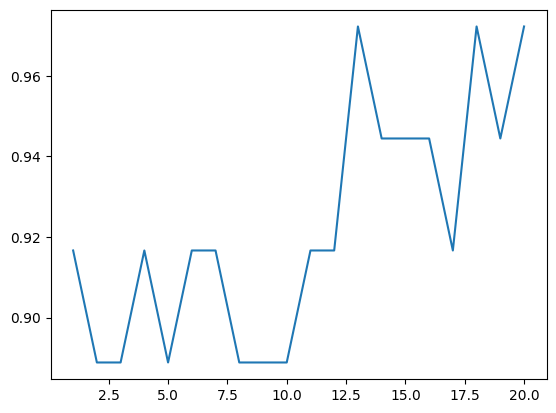

In [105]:
sns.lineplot(x=range(1,21), y=scores) # 그래프 생성 및 출력

In [106]:
knn = KNeighborsClassifier(n_neighbors=13) # KNN 모델 생성
knn.fit(X_train_scaled, y_train) # 학습
pred = knn.predict(X_test_scaled) # 예측
accuracy_score(y_test, pred)

0.9722222222222222

## 6.9 이해하기 : K-최근접 이웃